
## Text skewness correction
This tutorial demonstrates how to correct the skewness in a text.
The program takes as input a skewed source image and shows non skewed text.

  From openCV Git samples/python


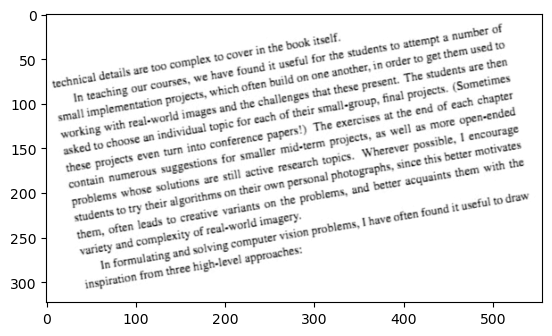

In [41]:
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt

# load the image from disk
imagefile=os.path.relpath("../../Data/imageTextR.png")

image = cv2.imread(imagefile)
gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')


Text(0.5, 1.0, 'Blobs')

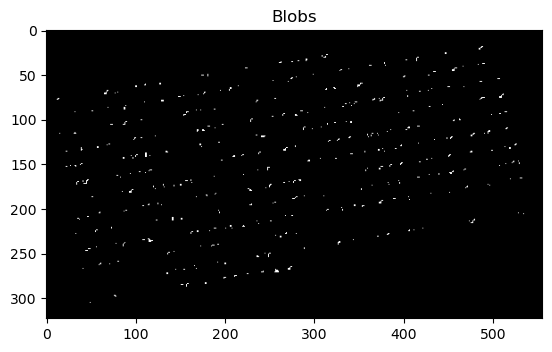

In [42]:
# threshold the image, setting all foreground pixels to 255 and all background pixels to 0

gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Applying erode filter to remove random noise
erosion_size = 1
element = cv2.getStructuringElement(cv2.MORPH_RECT, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size) )
gray = cv2.erode(gray, element)


plt.imshow(gray,cmap='gray'); plt.title('Blobs')

Text(0.5, 1.0, 'fixed')

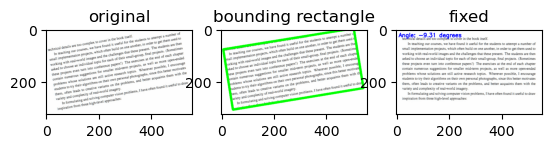

In [43]:
# This finds all the blobs in the image
coords = cv2.findNonZero(gray)

# This finds a rectangle bounding all the points
box = cv2.minAreaRect(coords)
angle=box[2]
    
# the `cv.minAreaRect` function returns values in the range [0, 90) if the angle is more than 45 we need to subtract 90 from it
if angle > 45:
    angle = (angle - 90)

(h, w) = image.shape[:2]
trans = (w // 2, h // 2)

# Get the rotation matrix that will rotate and translate 
M = cv2.getRotationMatrix2D(trans, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

rect=image.copy()
boxpts=np.intp(cv2.boxPoints(box))
rect=cv2.polylines(rect,[boxpts],True,(0,255,0),thickness=8)

plt.subplot(131); plt.imshow(image); plt.title('original')
plt.subplot(132); plt.imshow(rect); plt.title('bounding rectangle')
plt.subplot(133); plt.imshow(rotated); plt.title('fixed')
